# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

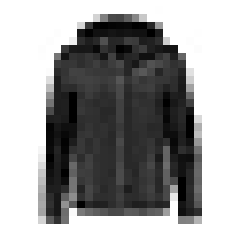

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [11]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

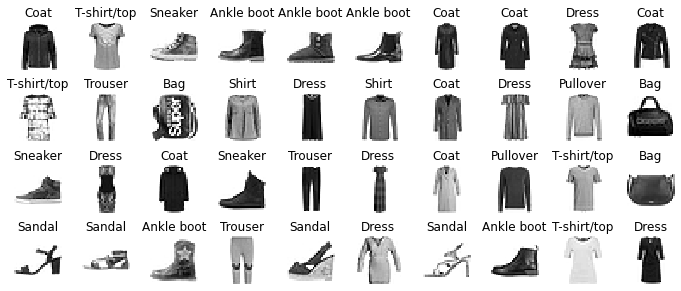

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer(hidden1.name) is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[-0.02968999,  0.0025996 ,  0.0177108 , ..., -0.03565042,
        -0.06723218,  0.02529808],
       [ 0.04182164,  0.01833183,  0.05839543, ...,  0.07212143,
        -0.02792902, -0.06318655],
       [ 0.00064681,  0.00799661,  0.02031802, ..., -0.02572067,
         0.03794558, -0.0586133 ],
       ...,
       [ 0.03278069, -0.06932122,  0.0077685 , ...,  0.03484901,
         0.06447722,  0.03836063],
       [ 0.07099734,  0.01826186,  0.00253194, ..., -0.00607032,
        -0.03650867, -0.02885129],
       [ 0.04615189,  0.03818949,  0.05780588, ..., -0.04562861,
         0.03432915, -0.00332545]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [28]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7191 - accuracy: 0.7652 - val_loss: 0.5131 - val_accuracy: 0.8276
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4912 - accuracy: 0.8297 - val_loss: 0.4525 - val_accuracy: 0.8412
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4465 - accuracy: 0.8443 - val_loss: 0.4338 - val_accuracy: 0.8480
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4207 - accuracy: 0.8529 - val_loss: 0.3990 - val_accuracy: 0.8590
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3989 - accuracy: 0.8605 - val_loss: 0.4133 - val_accuracy: 0.8534
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3818 - accuracy: 0.8658 - val_loss: 0.3818 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3676 - accuracy: 0.8712 - val_loss: 0.3630 - val_accuracy:

In [29]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [30]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

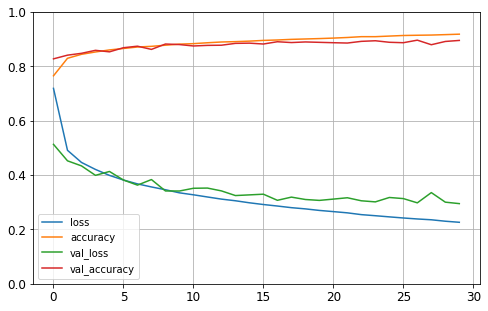

In [32]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3312 - accuracy: 0.8838


[0.33122408390045166, 0.8838000297546387]

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred =np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [36]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [37]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

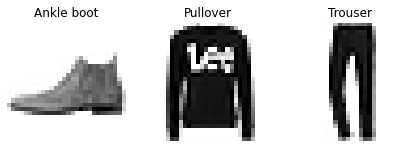

In [38]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

### Learning curves using different optimizers :

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7394 - accuracy: 0.7572 - val_loss: 0.5048 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4911 - accuracy: 0.8305 - val_loss: 0.4670 - val_accuracy: 0.8364
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4447 - accuracy: 0.8450 - val_loss: 0.4302 - val_accuracy: 0.8482
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4162 - accuracy: 0.8540 - val_loss: 0.4105 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3950 - accuracy: 0.8612 - val_loss: 0.3754 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3786 - accuracy: 0.8658 - val_loss: 0.3727 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3651 - accuracy: 0.8699 - val_loss: 0.3791 - val_accuracy:

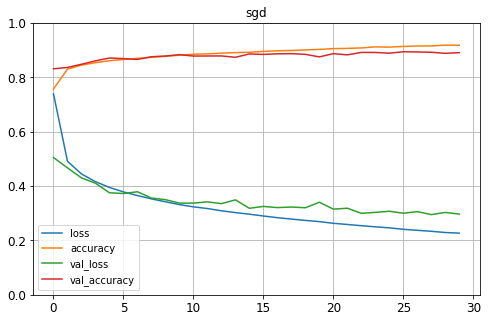

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0482 - accuracy: 0.6782 - val_loss: 0.7169 - val_accuracy: 0.7760
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6681 - accuracy: 0.7821 - val_loss: 0.6037 - val_accuracy: 0.8062
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5911 - accuracy: 0.8065 - val_loss: 0.5583 - val_accuracy: 0.8192
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5509 - accuracy: 0.8184 - val_loss: 0.5269 - val_accuracy: 0.8300
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5250 - accuracy: 0.8253 - val_loss: 0.5048 - val_accuracy: 0.8368
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5062 - accuracy: 0.8293 - val_loss: 0.4908 - val_accuracy: 0.8394
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4916 - accuracy: 0.8347 - val_loss: 0.4780 - val_accuracy:

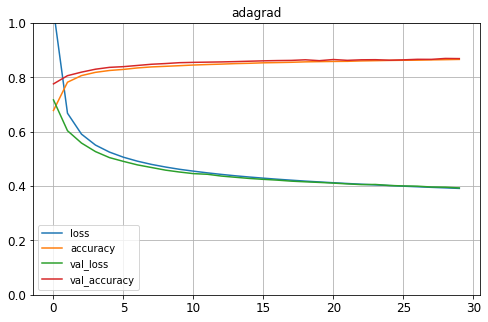

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 2.0246 - accuracy: 0.3236 - val_loss: 1.7655 - val_accuracy: 0.5680
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.5982 - accuracy: 0.6087 - val_loss: 1.4363 - val_accuracy: 0.6446
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 1.3369 - accuracy: 0.6474 - val_loss: 1.2233 - val_accuracy: 0.6662
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.1654 - accuracy: 0.6670 - val_loss: 1.0834 - val_accuracy: 0.6822
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0505 - accuracy: 0.6833 - val_loss: 0.9880 - val_accuracy: 0.6956
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9698 - accuracy: 0.7001 - val_loss: 0.9197 - val_accuracy: 0.7174
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9101 - accuracy: 0.7151 - val_loss: 0.8676 - val_accuracy:

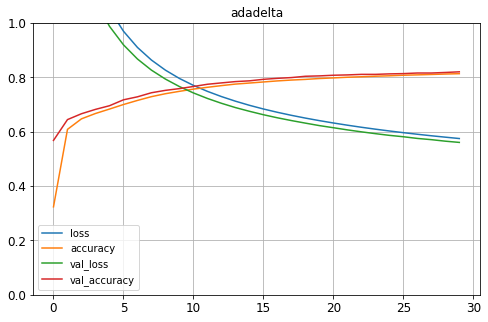

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5023 - accuracy: 0.8194 - val_loss: 0.3948 - val_accuracy: 0.8632
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3912 - accuracy: 0.8617 - val_loss: 0.4086 - val_accuracy: 0.8662
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3657 - accuracy: 0.8724 - val_loss: 0.3961 - val_accuracy: 0.8768
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3563 - accuracy: 0.8774 - val_loss: 0.4191 - val_accuracy: 0.8832
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3465 - accuracy: 0.8815 - val_loss: 0.5431 - val_accuracy: 0.8566
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3355 - accuracy: 0.8863 - val_loss: 0.4232 - val_accuracy: 0.8756
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3322 - accuracy: 0.8870 - val_loss: 0.4594 - val_accuracy:

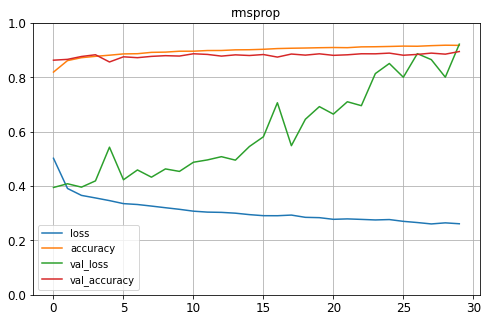

In [29]:
import pandas as pd
for opt in ['sgd','adagrad','adadelta','rmsprop']:
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(300, activation="relu"))
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])
    history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.title(opt)
    plt.show()

### Learning curves using different number of batch :

Epoch 1/30
4584/4584 [==============================] - 14s 3ms/step - loss: 0.6018 - accuracy: 0.7915 - val_loss: 0.4370 - val_accuracy: 0.8518
Epoch 2/30
4584/4584 [==============================] - 13s 3ms/step - loss: 0.4315 - accuracy: 0.8473 - val_loss: 0.3970 - val_accuracy: 0.8642
Epoch 3/30
4584/4584 [==============================] - 13s 3ms/step - loss: 0.3878 - accuracy: 0.8617 - val_loss: 0.3611 - val_accuracy: 0.8710
Epoch 4/30
4584/4584 [==============================] - 13s 3ms/step - loss: 0.3614 - accuracy: 0.8701 - val_loss: 0.3396 - val_accuracy: 0.8810
Epoch 5/30
4584/4584 [==============================] - 12s 3ms/step - loss: 0.3403 - accuracy: 0.8770 - val_loss: 0.3340 - val_accuracy: 0.8822
Epoch 6/30
4584/4584 [==============================] - 13s 3ms/step - loss: 0.3251 - accuracy: 0.8800 - val_loss: 0.3890 - val_accuracy: 0.8630
Epoch 7/30
4584/4584 [==============================] - 13s 3ms/step - loss: 0.3100 - accuracy: 0.8873 - val_loss: 0.3526 - val_ac

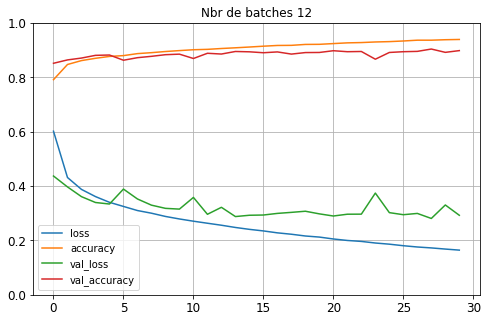

Epoch 1/30
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6655 - accuracy: 0.7775 - val_loss: 0.4707 - val_accuracy: 0.8370
Epoch 2/30
2500/2500 [==============================] - 8s 3ms/step - loss: 0.4625 - accuracy: 0.8379 - val_loss: 0.4291 - val_accuracy: 0.8522
Epoch 3/30
2500/2500 [==============================] - 8s 3ms/step - loss: 0.4182 - accuracy: 0.8523 - val_loss: 0.3941 - val_accuracy: 0.8670
Epoch 4/30
2500/2500 [==============================] - 8s 3ms/step - loss: 0.3908 - accuracy: 0.8607 - val_loss: 0.3824 - val_accuracy: 0.8700
Epoch 5/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.3716 - accuracy: 0.8686 - val_loss: 0.3554 - val_accuracy: 0.8778
Epoch 6/30
2500/2500 [==============================] - 8s 3ms/step - loss: 0.3542 - accuracy: 0.8742 - val_loss: 0.3676 - val_accuracy: 0.8698
Epoch 7/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.3394 - accuracy: 0.8783 - val_loss: 0.3491 - val_accuracy:

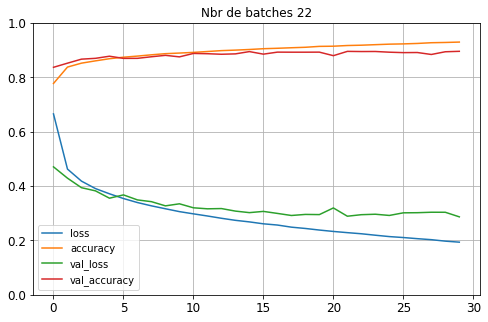

Epoch 1/30
1667/1667 [==============================] - 7s 4ms/step - loss: 0.7223 - accuracy: 0.7658 - val_loss: 0.5213 - val_accuracy: 0.8234
Epoch 2/30
1667/1667 [==============================] - 6s 4ms/step - loss: 0.4890 - accuracy: 0.8291 - val_loss: 0.5200 - val_accuracy: 0.8210
Epoch 3/30
1667/1667 [==============================] - 6s 4ms/step - loss: 0.4462 - accuracy: 0.8438 - val_loss: 0.4305 - val_accuracy: 0.8558
Epoch 4/30
1667/1667 [==============================] - 6s 4ms/step - loss: 0.4193 - accuracy: 0.8530 - val_loss: 0.4116 - val_accuracy: 0.8598
Epoch 5/30
1667/1667 [==============================] - 6s 4ms/step - loss: 0.3993 - accuracy: 0.8605 - val_loss: 0.4017 - val_accuracy: 0.8626
Epoch 6/30
1667/1667 [==============================] - 6s 4ms/step - loss: 0.3835 - accuracy: 0.8657 - val_loss: 0.3983 - val_accuracy: 0.8660
Epoch 7/30
1667/1667 [==============================] - 6s 4ms/step - loss: 0.3700 - accuracy: 0.8698 - val_loss: 0.3684 - val_accuracy:

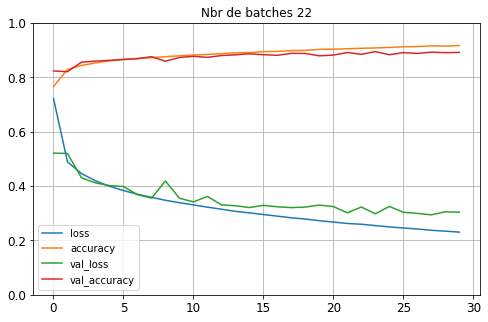

In [31]:
titles=["Nbr de batches 12","Nbr de batches 22","Nbr de batches 33"]
i=0
for nbr_batch in [12,22,33]:
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(300, activation="relu"))
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
    history = model.fit(X_train, y_train, batch_size=nbr_batch, epochs=30,
                    validation_data=(X_valid, y_valid))
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.title(titles[i])
    i=+1
    plt.show()

### Learning curves using different number of epoches :

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7149 - accuracy: 0.7635 - val_loss: 0.5569 - val_accuracy: 0.8090
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4894 - accuracy: 0.8296 - val_loss: 0.4529 - val_accuracy: 0.8410
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4435 - accuracy: 0.8463 - val_loss: 0.4346 - val_accuracy: 0.8444
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4171 - accuracy: 0.8543 - val_loss: 0.3955 - val_accuracy: 0.8652
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3949 - accuracy: 0.8619 - val_loss: 0.4065 - val_accuracy: 0.8596
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3807 - accuracy: 0.8656 - val_loss: 0.3726 - val_accuracy: 0.8734
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3669 - accuracy: 0.8708 - val_loss: 0.3641 - val_accuracy:

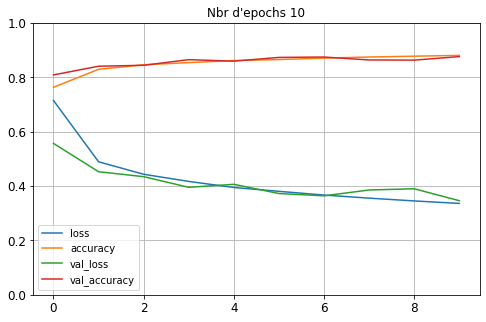

Epoch 1/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7110 - accuracy: 0.7672 - val_loss: 0.5176 - val_accuracy: 0.8224
Epoch 2/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4873 - accuracy: 0.8287 - val_loss: 0.5196 - val_accuracy: 0.8016
Epoch 3/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4417 - accuracy: 0.8452 - val_loss: 0.4093 - val_accuracy: 0.8626
Epoch 4/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4165 - accuracy: 0.8537 - val_loss: 0.4045 - val_accuracy: 0.8624
Epoch 5/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3965 - accuracy: 0.8606 - val_loss: 0.3781 - val_accuracy: 0.8710
Epoch 6/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3807 - accuracy: 0.8655 - val_loss: 0.3805 - val_accuracy: 0.8672
Epoch 7/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3671 - accuracy: 0.8697 - val_loss: 0.3649 - val_accuracy:

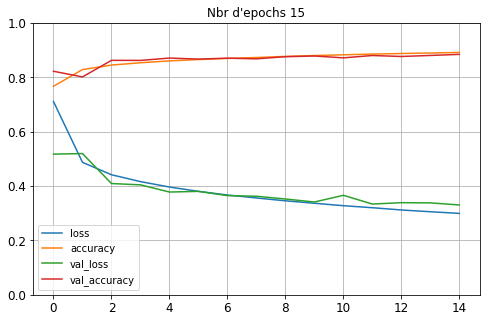

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7170 - accuracy: 0.7654 - val_loss: 0.5306 - val_accuracy: 0.8158
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4878 - accuracy: 0.8301 - val_loss: 0.4521 - val_accuracy: 0.8464
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4416 - accuracy: 0.8449 - val_loss: 0.4128 - val_accuracy: 0.8618
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4157 - accuracy: 0.8557 - val_loss: 0.3925 - val_accuracy: 0.8674
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3956 - accuracy: 0.8612 - val_loss: 0.3784 - val_accuracy: 0.8722
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3775 - accuracy: 0.8663 - val_loss: 0.3781 - val_accuracy: 0.8716
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3638 - accuracy: 0.8722 - val_loss: 0.3597 - val_accuracy:

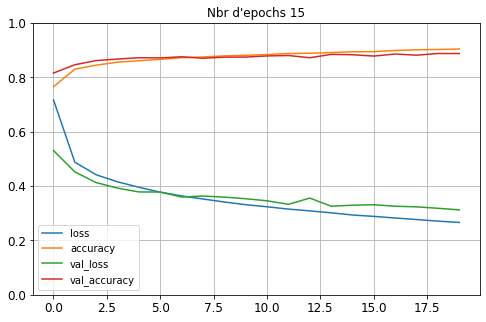

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7303 - accuracy: 0.7586 - val_loss: 0.5261 - val_accuracy: 0.8248
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4928 - accuracy: 0.8285 - val_loss: 0.4558 - val_accuracy: 0.8416
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4473 - accuracy: 0.8429 - val_loss: 0.4351 - val_accuracy: 0.8476
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4189 - accuracy: 0.8528 - val_loss: 0.4073 - val_accuracy: 0.8594
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3991 - accuracy: 0.8598 - val_loss: 0.4061 - val_accuracy: 0.8586
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3830 - accuracy: 0.8665 - val_loss: 0.3799 - val_accuracy: 0.8702
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3703 - accuracy: 0.8684 - val_loss: 0.3676 - val_accuracy:

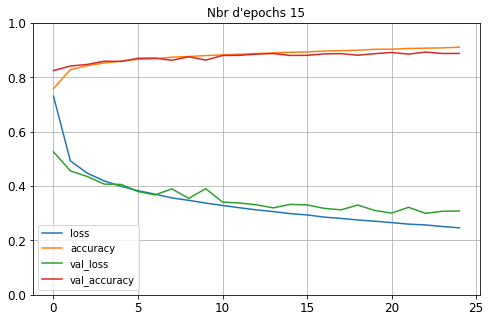

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7240 - accuracy: 0.7632 - val_loss: 0.5058 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4903 - accuracy: 0.8290 - val_loss: 0.4843 - val_accuracy: 0.8300
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4458 - accuracy: 0.8432 - val_loss: 0.4267 - val_accuracy: 0.8530
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4162 - accuracy: 0.8537 - val_loss: 0.3947 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3962 - accuracy: 0.8613 - val_loss: 0.4334 - val_accuracy: 0.8506
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3797 - accuracy: 0.8660 - val_loss: 0.3674 - val_accuracy: 0.8758
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3651 - accuracy: 0.8695 - val_loss: 0.3616 - val_accuracy:

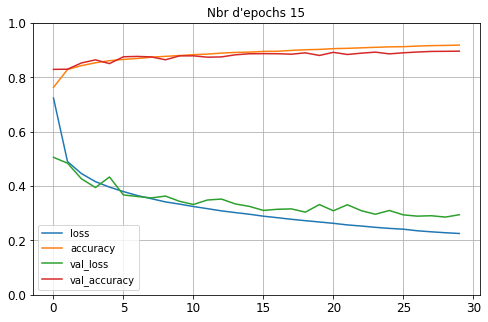

In [30]:
titles=["Nbr d'epochs 10","Nbr d'epochs 15","Nbr d'epochs 20","Nbr d'epochs 25","Nbr d'epochs 30"]
i=0
for nbr_epoch in [10,15,20,25,30]:
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(300, activation="relu"))
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
    history = model.fit(X_train, y_train, batch_size=32, epochs=nbr_epoch,
                    validation_data=(X_valid, y_valid))
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.title(titles[i])
    i=+1
    plt.show()

### Learning curves with additional neurons and Dropout layer :

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 5.3504 - accuracy: 0.3538 - val_loss: 2.0497 - val_accuracy: 0.7392
Epoch 2/30
1719/1719 [==============================] - 16s 9ms/step - loss: 3.6847 - accuracy: 0.4280 - val_loss: 2.0784 - val_accuracy: 0.7976
Epoch 3/30
1719/1719 [==============================] - 11s 7ms/step - loss: 3.3149 - accuracy: 0.4404 - val_loss: 2.0913 - val_accuracy: 0.8134
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 3.1912 - accuracy: 0.4476 - val_loss: 1.7996 - val_accuracy: 0.8342
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 3.1498 - accuracy: 0.4466 - val_loss: 1.9354 - val_accuracy: 0.8360
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 3.0778 - accuracy: 0.4524 - val_loss: 1.8489 - val_accuracy: 0.8392
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 3.0322 - accuracy: 0.4549 - val_loss: 1.9379 - val_accura

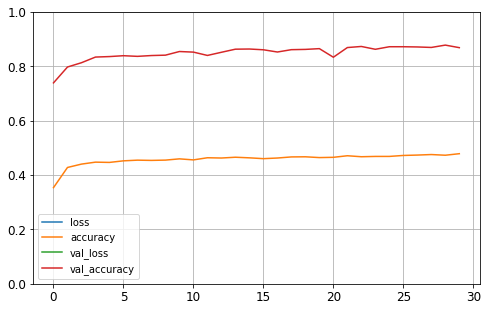

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(30, activation="softmax"))
model.add(keras.layers.Dropout(0.5))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Learning curves with additional neurons  :

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7366 - accuracy: 0.7602 - val_loss: 0.5099 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4931 - accuracy: 0.8278 - val_loss: 0.4372 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4462 - accuracy: 0.8433 - val_loss: 0.4580 - val_accuracy: 0.8426
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4198 - accuracy: 0.8520 - val_loss: 0.3899 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3988 - accuracy: 0.8608 - val_loss: 0.3849 - val_accuracy: 0.8642
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3808 - accuracy: 0.8673 - val_loss: 0.3707 - val_accuracy: 0.8756
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3665 - accuracy: 0.8705 - val_loss: 0.3743 - val_ac

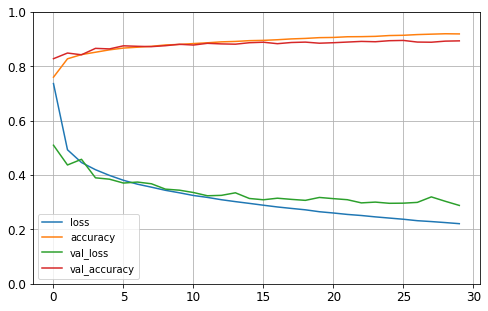

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(30, activation="softmax"))
model.add(keras.layers.Dropout(0.5))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Batch Normalisation

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 5.1087 - accuracy: 0.1383 - val_loss: 5.1033 - val_accuracy: 0.1008
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 5.2057 - accuracy: 0.0999 - val_loss: 5.1046 - val_accuracy: 0.1008
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 5.2058 - accuracy: 0.0999 - val_loss: 5.1027 - val_accuracy: 0.1008
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 5.2057 - accuracy: 0.0999 - val_loss: 5.1032 - val_accuracy: 0.1008
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 5.2058 - accuracy: 0.0999 - val_loss: 5.1036 - val_accuracy: 0.1008
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 5.2057 - accuracy: 0.0999 - val_loss: 5.1032 - val_accuracy: 0.1008
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 5.2057 - accuracy: 0.0999 - val_loss: 5.1029 - val_accuracy:

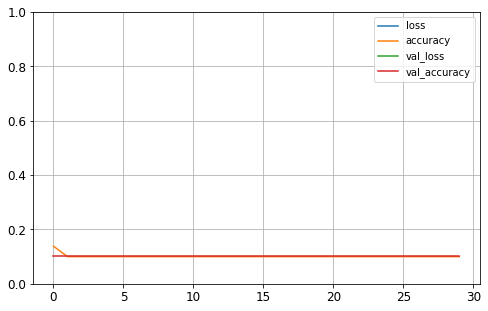

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.add(keras.layers.BatchNormalization())
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### More layers

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7750 - accuracy: 0.7408 - val_loss: 0.5406 - val_accuracy: 0.8016
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4918 - accuracy: 0.8255 - val_loss: 0.4910 - val_accuracy: 0.8268
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4403 - accuracy: 0.8441 - val_loss: 0.3981 - val_accuracy: 0.8606
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4077 - accuracy: 0.8540 - val_loss: 0.4542 - val_accuracy: 0.8330
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3851 - accuracy: 0.8631 - val_loss: 0.3965 - val_accuracy: 0.8574
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3666 - accuracy: 0.8678 - val_loss: 0.3723 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3526 - accuracy: 0.8728 - val_loss: 0.3528 - val_accuracy:

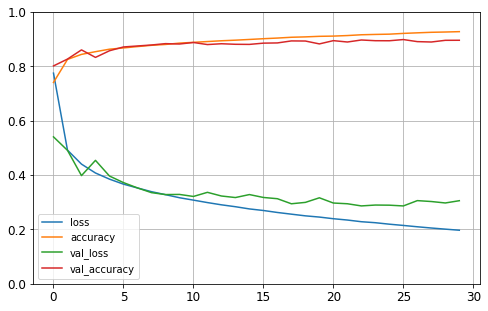

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(30, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()